In [53]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [54]:
df =pd.read_csv('unsupervised.csv')
df.head(5)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [55]:
df=df.drop(columns=['Name'],axis="columns")
df

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


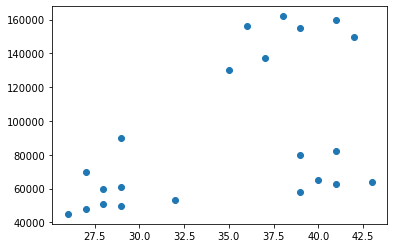

In [56]:

plt.scatter(df.Age,df['Income($)'])

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [58]:
scaler.fit(df[['Age']])

MinMaxScaler()

In [59]:
df['age']=scaler.fit_transform(df[['Age']])
df

,Age,Income($),age
0,27,70000,0.058824
1,29,90000,0.176471
2,29,61000,0.176471
3,28,60000,0.117647
4,42,150000,0.941176
5,39,155000,0.764706
6,41,160000,0.882353
7,38,162000,0.705882
8,36,156000,0.588235
9,35,130000,0.529412


In [60]:
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [61]:
df['income']=scaler.fit_transform(df[['Income($)']])

In [62]:
df

,Age,Income($),age,income
0,27,70000,0.058824,0.213675
1,29,90000,0.176471,0.384615
2,29,61000,0.176471,0.136752
3,28,60000,0.117647,0.128205
4,42,150000,0.941176,0.897436
5,39,155000,0.764706,0.940171
6,41,160000,0.882353,0.982906
7,38,162000,0.705882,1.000000
8,36,156000,0.588235,0.948718
9,35,130000,0.529412,0.726496


In [63]:
df=df.drop(columns=['Income($)','Age'])
df

,age,income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436
5,0.764706,0.940171
6,0.882353,0.982906
7,0.705882,1.000000
8,0.588235,0.948718
9,0.529412,0.726496


In [64]:
model=KMeans(n_clusters=3)
from sklearn.model_selection import train_test_split
prediction=model.fit_predict(df)
prediction=pd.DataFrame(prediction)

In [65]:
df['class']=prediction

df

,age,income,class
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [82]:
df1=df.loc[df['class']==1]
df2=df.loc[df['class']==2]
df3=df.loc[df['class']==0]
df1

,age,income,class
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1
10,0.647059,0.786325,1


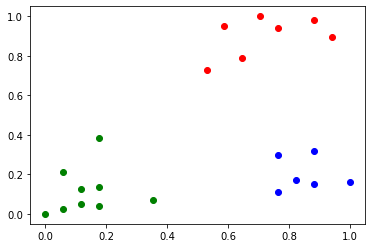

In [83]:
plt.scatter(df1.age,df1.income,color='red')
plt.scatter(df2.age,df2.income,color='blue')
plt.scatter(df3.age,df3.income,color='green')

In [84]:
 import joblib
    

In [85]:
joblib.dump(model,'K means.joblib')

['K means.joblib']